## TOPIC --> Predict Credit Card Acceptance
## WELCOME
### NOW WE DO SOME PART OF DATA ANALYSIS
#### First We Want to import some module

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




#### Now we want to read the given csv file 

In [ ]:
try:
    OurData = pd.read_csv("C:/Users/Jamam/Desktop/Credit_card.csv")  
except NameError:
    print("ERROR !!! INVALID PATH OR FILE NAME")
OurData

#### Now we want to decribe each columns attributes

#### Now we want to find the information of the given data (by using .info() )

In [4]:
OurData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 12 columns):
card           1319 non-null object
reports        1319 non-null int64
age            1319 non-null float64
income         1319 non-null float64
share          1319 non-null float64
expenditure    1319 non-null float64
owner          1319 non-null object
selfemp        1319 non-null object
dependents     1319 non-null int64
months         1319 non-null int64
majorcards     1319 non-null int64
active         1319 non-null int64
dtypes: float64(4), int64(5), object(3)
memory usage: 108.2+ KB


#### Now we want to find number of null-values in the form of heatmap

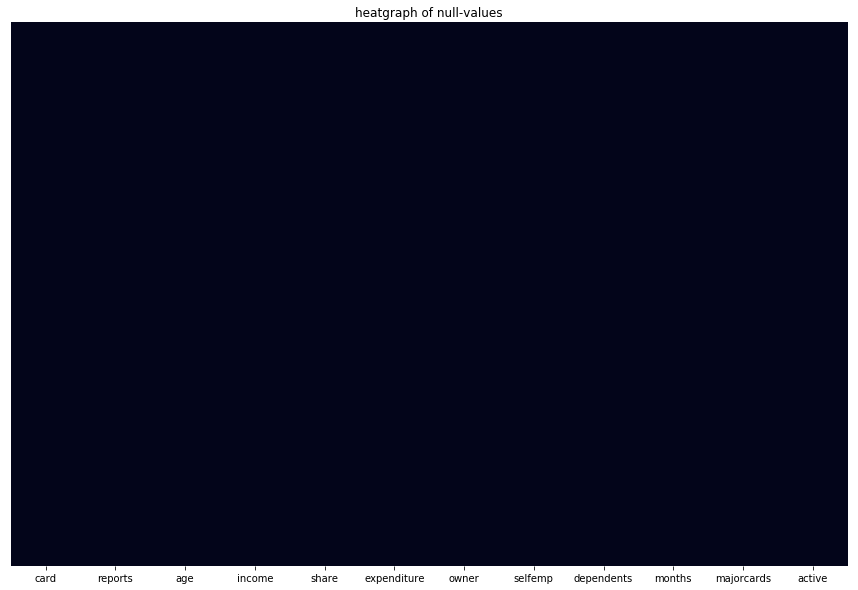

In [5]:
plt.figure(figsize=(15,10))
plt.title('heatgraph of null-values')
sns.heatmap(OurData.isnull(),yticklabels=False,cbar=False)

#### Now we find some meanfull information from the Dataset( by using .describe() )

In [6]:
OurData.describe()

,reports,age,income,share,expenditure,dependents,months,majorcards,active
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,0.456406,33.213103,3.365376,0.068732,185.057071,0.993935,55.267627,0.817286,6.996967
std,1.345267,10.142783,1.693902,0.094656,272.218917,1.247745,66.271746,0.386579,6.305812
min,0.000000,0.166667,0.210000,0.000109,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,25.416670,2.243750,0.002316,4.583333,0.000000,12.000000,1.000000,2.000000
50%,0.000000,31.250000,2.900000,0.038827,101.298300,1.000000,30.000000,1.000000,6.000000
75%,0.000000,39.416670,4.000000,0.093617,249.035800,2.000000,72.000000,1.000000,11.000000
max,14.000000,83.500000,13.500000,0.906320,3099.505000,6.000000,540.000000,1.000000,46.000000


In [7]:
OurData.quantile(q=0.25,axis=0)

reports         0.000000
age            25.416670
income          2.243750
share           0.002316
expenditure     4.583333
dependents      0.000000
months         12.000000
majorcards      1.000000
active          2.000000
Name: 0.25, dtype: float64

#### Now we find correlation between different columns attributes( by using .corr() )

In [8]:
OurData.corr()

,reports,age,income,share,expenditure,dependents,months,majorcards,active
reports,1.000000,0.044089,0.011023,-0.159011,-0.136538,0.019731,0.048968,-0.007304,0.207755
age,0.044089,1.000000,0.324653,-0.115697,0.014948,0.212146,0.436426,0.009777,0.181070
income,0.011023,0.324653,1.000000,-0.054429,0.281104,0.317601,0.130346,0.107138,0.180540
share,-0.159011,-0.115697,-0.054429,1.000000,0.838779,-0.082618,-0.055348,0.051470,-0.023474
expenditure,-0.136538,0.014948,0.281104,0.838779,1.000000,0.052664,-0.029007,0.077514,0.054724
dependents,0.019731,0.212146,0.317601,-0.082618,0.052664,1.000000,0.046512,0.010285,0.107133
months,0.048968,0.436426,0.130346,-0.055348,-0.029007,0.046512,1.000000,-0.041447,0.100028
majorcards,-0.007304,0.009777,0.107138,0.051470,0.077514,0.010285,-0.041447,1.000000,0.119603
active,0.207755,0.181070,0.180540,-0.023474,0.054724,0.107133,0.100028,0.119603,1.000000


Text(0.5, 1.0, 'heatgraph of correlation')

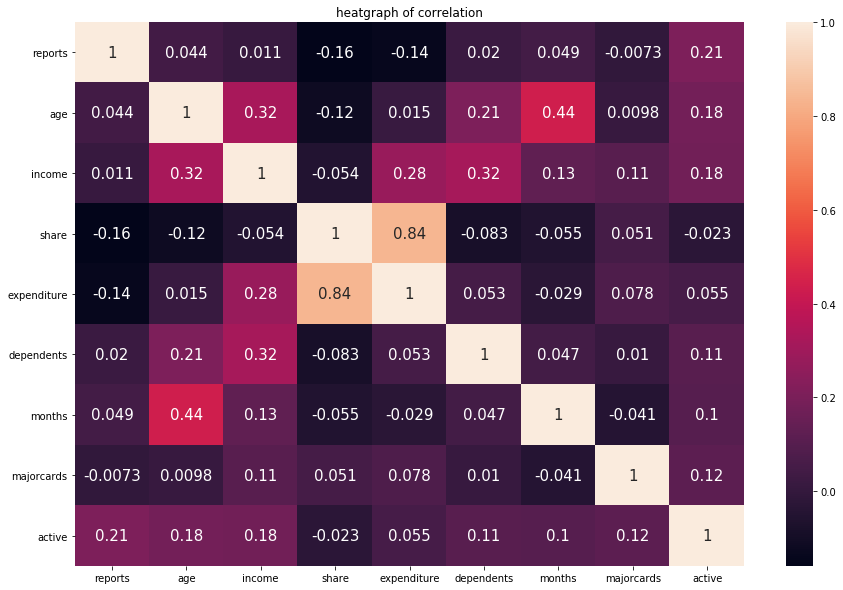

In [9]:
corr=OurData.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True,annot_kws={"size":15})
plt.title('heatgraph of correlation')

### Now we find some meanfull graph from the Dataset
#### Countplot of Number of People Who Got The Card And Who Doesn't

In [ ]:
sns.countplot(x='card',data=OurData,palette='rainbow')
plt.xlabel("Card")
plt.ylabel("no. of people")
plt.title('Card V/s No. of people')

#### Relation Between Card And Reports
##### first, with the help of groupby() we find number of negetives reports respective card acceptance

In [ ]:
for grp,d in OurData.groupby("card"):
    print("Card",grp,"\nReports",d["reports"].sum())
    print("---------------------------------")

In [ ]:
d2=pd.DataFrame({"Card":["yes","no"],"Reports":[132,470]})
d2

In [ ]:
plt.bar(d2["Card"],d2["Reports"])
plt.xlabel("Card")
plt.ylabel("no. of reports")
plt.title('Card V/s No. of reports')

#### Countplot of Number of Times of Reports V/s Number of Reports

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x='reports',data=OurData,palette='rainbow')
plt.xlabel("number of times of reports")
plt.ylabel("no. of reports")
plt.title('number of times of reports V/s No. of reports')

#### Scatter Plot of Income V/s Active And Non-Active Credit Accounts

In [ ]:
plt.figure(figsize=(15,10))
color_c={"yes":"green","no":"red"}
plt.scatter(OurData["income"],OurData["active"],c=OurData["card"].apply(lambda x:color_c[x]),s=10)
plt.xlabel("income ")
plt.ylabel("no. of active and non-active credit cards")
plt.title('Income V/s No. of active and non-active credit cards')
plt.show()


#### Countplot of Dependents With Respect to Number of People

In [ ]:
plt.figure(figsize=(15,10))
sns.set_style('whitegrid')
sns.countplot(x='dependents',data=OurData,palette='husl')
plt.xlabel("dependents ")
plt.ylabel("no. of people")
plt.title('Dependants V/s no. of people')

#### Countplot of Active V/s Number of People 

In [ ]:
plt.figure(figsize=(15,10))
sns.set_style('darkgrid')
sns.countplot(x='active',data=OurData,palette='rainbow')
plt.xlabel("active ")
plt.ylabel("no. of people")
plt.title('Active V/s No. of people')

#### Kdeplot of Active V/s Age

In [ ]:
plt.figure(figsize=(10,10))
sns.kdeplot(OurData.active,OurData.age)
plt.title('Active V/s Age')

#### Jointplot of Active Accounts V/s Dependants

In [ ]:
sns.jointplot(x='active',y='dependents',data=OurData)
plt.title('active V/s Dependents')

#### Jointplot of Active Accounts With Respects to Months 

In [ ]:
plt.figure(figsize=(10,10))
sns.jointplot(x="months",y="active",data=OurData)
plt.title('months V/s Active')

#### Distplot of Share V/s Number of People

In [ ]:
plt.figure(figsize=(10,10))
sns.distplot(OurData.share)
plt.title('Share V/s number of people')

#### Violinplot of Self Employment V/s Report

In [ ]:
plt.figure(figsize=(15,10))
sns.set_style('whitegrid')
sns.violinplot('selfemp','reports',data=OurData,hue='card')


#### Now for boxplot

In [ ]:
plt.figure(figsize=(15,10))
sns.set_style('whitegrid')
sns.boxplot('selfemp','reports',data=OurData,hue='card')


### NOW WE DO SOME PART OF PEDICTION AND MECHINE LEARNING

#### Naive Bayes Classifier

##### Calculate Priors

In [ ]:
# number of people whose card are accepted
Y_card = OurData["card"][OurData["card"] == "yes"].count()
# number of people whose card are not accepted
N_card = OurData["card"][OurData["card"] == "no"].count()
# total number of people
total_card = OurData["card"].count()

print("Number of people whose card is accepted : {}   Number of people whose card is not accepted : {}   Total number of people : {}".format(Y_card,N_card,total_card))

In [ ]:
p_yes=Y_card/total_card
p_no=N_card/total_card
print ("Probability of card acceptance =",p_yes," and card non acceptance =",p_no)

In [ ]:
# group the data by gender and calculate the means of each feature
data_means = OurData.groupby("card").mean()
# view the values
data_means

In [ ]:
# group the data by gender and calculate the variance of each feature
data_variance = OurData.groupby("card").var()
# view the values
data_variance

In [ ]:
data_variance[["reports","income","share","months","majorcards","active"]]

In [ ]:
data_variance[["reports","income","share","months","majorcards","active"]][data_variance.index =="no"]

In [ ]:
data_variance[["reports","income","share","months","majorcards","active"]][data_variance.index =="no"].values[0]

In [ ]:
credit_card_not_accepted_reports_means=data_means["reports"][data_means.index=="no"].values[0]
credit_card_not_accepted_income_means=data_means["income"][data_means.index=="no"].values[0]
credit_card_not_accepted_share_means=data_means["share"][data_means.index=="no"].values[0]
credit_card_not_accepted_months_means=data_means["months"][data_means.index=="no"].values[0]
credit_card_not_accepted_majorcards_means=data_means["majorcards"][data_means.index=="no"].values[0]
credit_card_not_accepted_active_means=data_means["active"][data_means.index=="no"].values[0]
print(credit_card_not_accepted_reports_means,credit_card_not_accepted_income_means,credit_card_not_accepted_share_means,
      credit_card_not_accepted_months_means,credit_card_not_accepted_majorcards_means,credit_card_not_accepted_active_means)

In [ ]:
credit_card_accepted_reports_means=data_means["reports"][data_means.index=="yes"].values[0]
credit_card_accepted_income_means=data_means["income"][data_means.index=="yes"].values[0]
credit_card_accepted_share_means=data_means["share"][data_means.index=="yes"].values[0]
credit_card_accepted_months_means=data_means["months"][data_means.index=="yes"].values[0]
credit_card_accepted_majorcards_means=data_means["majorcards"][data_means.index=="yes"].values[0]
credit_card_accepted_active_means=data_means["active"][data_means.index=="yes"].values[0]

print(credit_card_accepted_reports_means,credit_card_accepted_income_means,credit_card_accepted_share_means,
      credit_card_accepted_months_means,credit_card_accepted_majorcards_means,credit_card_accepted_active_means)

In [ ]:
credit_card_not_accepted_reports_var=data_variance["reports"][data_variance.index=="no"].values[0]
credit_card_not_accepted_income_var=data_variance["income"][data_variance.index=="no"].values[0]
credit_card_not_accepted_share_var=data_variance["share"][data_variance.index=="no"].values[0]
credit_card_not_accepted_months_var=data_variance["months"][data_variance.index=="no"].values[0]
credit_card_not_accepted_majorcards_var=data_variance["majorcards"][data_variance.index=="no"].values[0]
credit_card_not_accepted_active_var=data_variance["active"][data_variance.index=="no"].values[0]

print(credit_card_not_accepted_reports_var,credit_card_not_accepted_income_var,credit_card_not_accepted_share_var,
      credit_card_not_accepted_months_var,credit_card_not_accepted_majorcards_var,credit_card_not_accepted_active_var)

In [ ]:
credit_card_accepted_reports_var=data_variance["reports"][data_variance.index=="yes"].values[0]
credit_card_accepted_income_var=data_variance["income"][data_variance.index=="yes"].values[0]
credit_card_accepted_share_var=data_variance["share"][data_variance.index=="yes"].values[0]
credit_card_accepted_months_var=data_variance["months"][data_variance.index=="yes"].values[0]
credit_card_accepted_majorcards_var=data_variance["majorcards"][data_variance.index=="yes"].values[0]
credit_card_accepted_active_var=data_variance["active"][data_variance.index=="yes"].values[0]
print(credit_card_accepted_reports_var,credit_card_accepted_income_var,credit_card_accepted_share_var,
      credit_card_accepted_months_var,credit_card_accepted_majorcards_var,credit_card_accepted_active_var)

In [ ]:
# create a function that calculates p(x | y):
def p_x_given_y(x,mean_y,variance_y):
    # input the argiments into a probability density function
    p = 1 / (np.sqrt(2 * np.pi * variance_y)) * \
                    np.exp((- (x - mean_y) ** 2) / (2 * variance_y))
    return p

In [ ]:
pr_card=pd.DataFrame()
pr_card["reports"]=[int(input('Enter the number of reports : '))]
pr_card["income"]=[float(input('Enter Yearly income (divided by 10,000) : '))]
pr_card["share"]=[float(input('Enter share (Ratio of monthly credit card expenditure to yearly income) : '))]
pr_card["months"]=[int(input('Enter Months living at current address : '))]
pr_card["majorcards"]=[int(input('Enter the number of majorcards : '))]
pr_card["active"]=[int(input('Enter the number of active card : '))]
pr_card

In [ ]:
posterior_numerator_card_not = N_card * \
p_x_given_y(pr_card["reports"],credit_card_not_accepted_reports_means,credit_card_not_accepted_reports_var) * \
p_x_given_y(pr_card["income"],credit_card_not_accepted_income_means,credit_card_not_accepted_income_var) * \
p_x_given_y(pr_card["share"],credit_card_not_accepted_share_means,credit_card_not_accepted_share_var) * \
p_x_given_y(pr_card["months"],credit_card_not_accepted_months_means,credit_card_not_accepted_months_var) * \
p_x_given_y(pr_card["majorcards"],credit_card_not_accepted_majorcards_means,credit_card_not_accepted_majorcards_var) * \
p_x_given_y(pr_card["active"],credit_card_not_accepted_active_means,credit_card_not_accepted_active_var)
posterior_numerator_card = Y_card * \
p_x_given_y(pr_card["reports"],credit_card_accepted_reports_means,credit_card_accepted_reports_var) * \
p_x_given_y(pr_card["income"],credit_card_accepted_income_means,credit_card_accepted_income_var) * \
p_x_given_y(pr_card["share"],credit_card_accepted_share_means,credit_card_accepted_share_var) * \
p_x_given_y(pr_card["months"],credit_card_accepted_months_means,credit_card_accepted_months_var) * \
p_x_given_y(pr_card["majorcards"],credit_card_accepted_majorcards_means,credit_card_accepted_majorcards_var) * \
p_x_given_y(pr_card["active"],credit_card_accepted_active_means,credit_card_accepted_active_var)


In [ ]:
print ("Numerator of Posterior for accept of credit card is\n",posterior_numerator_card.values[0])
print ("Numerator of Posterior for non-accept of credit card is\n",posterior_numerator_card_not.values[0])
if (posterior_numerator_card.values[0] >= posterior_numerator_card_not.values[0]):
    print ("Prediction is credit card is accept...")
else:
    print ("Prediction is credit card is not accept...")

#### K-NN or K-Nearest Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [ ]:
OurData.head(10)

In [ ]:
imp_col=OurData.columns[1:]
imp_col

In [ ]:
OurData["card"].replace(["no","yes"],[0,1],inplace=True)
OurData["owner"].replace(["no","yes"],[0,1],inplace=True)
OurData["selfemp"].replace(["no","yes"],[0,1],inplace=True)
print(OurData)
data=OurData
data

In [ ]:
data=OurData[["reports","income","share","months","majorcards","active"]]
data=np.array(data)
data

In [ ]:
target=OurData[["card"]]
target=np.array(target)
target=target.flatten()
print(target)

In [ ]:
X=data
print("X :-",X)
y=target
print("y :-",y)

In [ ]:
# Standardise Data
# Create standardizer
standardizer = StandardScaler()
# standardize features
X_std = standardizer.fit_transform(X)
print ("X_std:\n",X_std)

In [ ]:
# fit a k-nearest neighbor classifier
# fit a KNN classifier with 5 neighbors
knn=KNeighborsClassifier(n_neighbors=5,metric="euclidean",
                         n_jobs=-1).fit(X_std,y)

In [ ]:
# create search space of possible values ok k
# create a pipeline
pipe = Pipeline([("standardizer",standardizer),("knn",knn)])
# create space of candidate values
search_space=[{"knn__n_neighbors":[1,2,3,4,5,6,7,8,9,10]}]

In [ ]:
# search over possible values of k
# create grid search GridSearchCV implements "fit" and "score" method.
# the parameters of the estimator used to apply these methods are
# optimized by cross-validated grid-search over a parameter grid.
clf = GridSearchCV(pipe,search_space,cv=5,verbose=1).fit(X_std,y)

In [ ]:
# view k for best performing model
# best neighborhood size (k)
clf.best_estimator_.get_params()["knn__n_neighbors"]

In [ ]:
from sklearn import neighbors

In [ ]:
# train the learner
clf = neighbors.KNeighborsClassifier(8,weights="uniform")
trained_model = clf.fit(X,y)
# our model has been trained

In [ ]:
# view the models score to check how good is our model
trained_model.score(X,y)

In [ ]:
# preparing the test data
x_test = np.array([[0,1.5,0.058608,64,1,6]])
print (x_test)
trained_model.predict(x_test)

In [ ]:
# now printing the probability
trained_model.predict_proba(x_test)

In [ ]:
a=knn.score(X,y)
a

#### Decision Tree

In [ ]:
OurData.head()

In [ ]:
OurData.card.replace([1, 0], ['A', 'B'], inplace=True)
OurData.head()

In [ ]:
OurData.card.value_counts()

In [ ]:
round(OurData.card.value_counts()*100/len(OurData.axes[0]),2)

##### Test and Train Sample
##### Now, we have a data sample, which can be considered for the modeling. We are splitting the data into Test Sample (which will be used for validating the model developed) and Train Sample (which will be used for Model development).

In [ ]:
# Split sample into Train and Test
from sklearn.model_selection import train_test_split
Train,Test = train_test_split(OurData, test_size = 0.3, 
                              random_state = 176)

# Print a few rows
Train.head()

In [ ]:
# Keep Target and Independent Variable into different array
Train_IndepentVars = Train.values[:, 1:12]
Train_TargetVar = Train.values[:,0]

In [ ]:
Train_IndepentVars

In [ ]:
Train_TargetVar,len(Train_TargetVar)

In [ ]:
print ("Total rows = ", len(Train_TargetVar))
print ("Total A-rows = ", (Train_TargetVar == 'A').sum())
print ("Total B-rows = ",(Train_TargetVar == 'B').sum())

We have arrays for independent variables and the target variable.
We can now build decision tree classifier. 
We are using DecisionTreeClassifier from sklearn library.  
"gini" option helps in leveraging CART - 
Classification and Regression Tree - algorithm for fitting the decision tree.

In [ ]:
# Load library
#from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
# Building Decision Tree - CART Algorithm (gini criteria)
dt_train_gini = DecisionTreeClassifier(criterion = "gini", 
                                       random_state = 100,
                               max_depth=5, min_samples_leaf=5)
# Train
dt_train_gini.fit(Train_IndepentVars, Train_TargetVar)

In [ ]:
b=dt_train_gini.score(Train_IndepentVars,Train_TargetVar)
b

#### Decision Tree Visualization
To see the decision tree plot we'll use graphviz.

In [ ]:
from sklearn import tree
with open("dt_train_gini.txt", "w") as f:
    f = tree.export_graphviz(dt_train_gini, out_file=f)

This step create a text file dt_train_gini.txt in the default folder. We can give full path as well. We can copy the context of this text file and put into the box on http://www.webgraphviz.com/

#### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
OurData.head(5)

In [ ]:
OurData.card.replace(["A", "B"], [1, 0], inplace=True)

In [ ]:
OurData.head(5)

In [ ]:
Train,Test = train_test_split(OurData, test_size = 0.3, 
                              random_state = 176)
print("No. of Train rows -> ",len(Train))
print("No. of Test rows -> ",len(Test))

In [ ]:
Train_IndepentVars = Train.values[:, 1:12]
Train_TargetVar = Train.values[:,0]
print(Train_IndepentVars)
print(Train_TargetVar)

In [ ]:
logmodel=LogisticRegression()
logmodel.fit(Train_IndepentVars,Train_TargetVar)

In [ ]:
predictions=logmodel.predict(Train_IndepentVars)
predictions,len(predictions)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(Train_TargetVar,predictions))

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
print (pd.Series(Train_TargetVar).value_counts())
print(confusion_matrix(Train_TargetVar,predictions))
# confusion_matrix(Train_TargetVar,predictions)
confusion_df = pd.DataFrame(confusion_matrix(Train_TargetVar,predictions),
             columns=["Predicted Class " + str(class_name) for class_name in [0,1]],
             index = ["Class " + str(class_name) for class_name in [0,1]])

print(confusion_df)

#                 predicted     
# actual     No           YES
# NO         TN           FP   
# YES        FN           TP

In [ ]:
print(logmodel.coef_)

In [ ]:
print(logmodel.intercept_)

In [ ]:
c=logmodel.score(Train_IndepentVars,Train_TargetVar)
c

#### MODEL BUILDING

In [ ]:
OurData.head()

In [ ]:
X=OurData.drop("card",axis=1)
X.head()

In [ ]:
y=OurData.card
y.head()

In [ ]:
# Split sample into Train and Test
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
Train,Test = train_test_split(OurData, test_size = 0.3, 
                              random_state = 176)

Train_IndepentVars = Train.values[:, 1:12]
Train_TargetVar = Train.values[:,0]
Test_IndepentVars=Test.values[:,1:12]
Test_TargetVar=Test.values[:,0]
regressor = LinearRegression()
regressor.fit(Train_IndepentVars, Train_TargetVar)

print (len(Train_IndepentVars), len(Train_TargetVar))

In [ ]:
# result = regressor.fit(X, y)
# print(result)

In [ ]:
print ('Estimated intercept:', regressor.intercept_)

In [ ]:
print ('Number of coefficients:', len(regressor.coef_))
print ('Coefficients:', regressor.coef_)

In [ ]:
Test=Test.drop("card",axis=1)
Test.head()

In [ ]:
# Calculate R-squared:
# R-squared is a statistical measure of how close the
# data are to the fitted regression line. It is also
# known as the coefficient of determination

y_pred = regressor.predict(Test)
print ("y_pred : ",y_pred)
print('Linear Regression R squared: %.4f' \
      % regressor.score(Test_IndepentVars,Test_TargetVar))

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_pred, Test_TargetVar)
lin_rmse = np.sqrt(lin_mse)
print('Linear Regression RMSE: %.4f' % lin_rmse)

In [ ]:
# Calculate mean absolute error (MAE):
# In statistics, mean absolute error (MAE) is a 
# measure of difference between two continuous 
# variables

from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y_pred, Test_TargetVar)
print('Linear Regression MAE: %.4f' % lin_mae)

In [ ]:
 # Preliminaries
# Load libraries
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score,auc
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [ ]:
OurData.head()

# Training Binary Classifier
# Create classifier
clf = LogisticRegression()

# Train model
clf.fit(Train_IndepentVars, Train_TargetVar)

In [ ]:
# Create Predicted Probabilities
# Get predicted probabilities
y_score = clf.predict_proba(Test_IndepentVars)[:,1]
y_score

In [ ]:
# Plot Receiving Operating Characteristic Curve
# Create true and false positive rates

false_positive_rate, true_positive_rate, threshold = roc_curve(Test_TargetVar, y_score)

# Plot ROC curve
plt.title('Receiver Operating Characteristic (ROC)')
roc_auc=auc(false_positive_rate,true_positive_rate)
plt.plot(false_positive_rate, true_positive_rate,'b',label="AUC=%f"%roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7")
plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate (TPR=TP/P=TP/(TP+FN))')
plt.xlabel('False Positive Rate (FPR=FP/N=FP/(FP+TN))')
plt.show()

In [ ]:
## Precision = TP/(TP + FP)
# Recall = TP/(TP + FN)
# F1-score = 2 x (precision x recall)/(precision + recall)

# Cross-Validate Model Using Recall
cross_val_score(clf, X, y, scoring="recall")

In [ ]:
# Precision = TP/(TP + FP)
# Recall = TP/(TP + FN)
# F1-score = 2 x (precision x recall)/(precision + recall)

# Cross-validate model using precision
cross_val_score(clf, X, y, scoring="precision")

In [ ]:
my_col=["Model","Score"]
Aco=pd.DataFrame([["Knn",a],
                ["decision Tree",b],
                ["Logistic Regression",c]],columns = my_col)
Aco

In [ ]:
plt.bar(Aco.Model,Aco.Score)